# KFold

In [1]:
# import pandas and model_selection module of scikit-learn
import pandas as pd
from sklearn import model_selection

In [47]:
# Training data is in a CSV file called train.csv
df = pd.read_csv("winequality-red.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [48]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [49]:
# we create a new column called kfold and fill it with -1
df["kfold"] = -1

In [50]:
# the next step is to randomize the rows of the data
df = df.sample(frac=1).reset_index(drop=True)

In [51]:
# initiate the kfold class from model_selection module
kf = model_selection.KFold(n_splits=5)

In [52]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,8.5,0.655,0.49,6.10,0.122,34.0,151.0,1.00100,3.31,1.14,9.3,5,-1
1,12.6,0.410,0.54,2.80,0.103,19.0,41.0,0.99939,3.21,0.76,11.3,6,-1
2,9.8,0.880,0.25,2.50,0.104,35.0,155.0,1.00100,3.41,0.67,11.2,5,-1
3,7.2,0.570,0.05,2.30,0.081,16.0,36.0,0.99564,3.38,0.60,10.3,6,-1
4,8.5,0.180,0.51,1.75,0.071,45.0,88.0,0.99524,3.33,0.76,11.8,7,-1


In [53]:
# fill the new kfold column
for fold, (trn_, val_) in enumerate(kf.split(X=df)):
    df.loc[val_, 'kfold'] = fold

In [54]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,8.5,0.655,0.49,6.10,0.122,34.0,151.0,1.00100,3.31,1.14,9.3,5,0
1,12.6,0.410,0.54,2.80,0.103,19.0,41.0,0.99939,3.21,0.76,11.3,6,0
2,9.8,0.880,0.25,2.50,0.104,35.0,155.0,1.00100,3.41,0.67,11.2,5,0
3,7.2,0.570,0.05,2.30,0.081,16.0,36.0,0.99564,3.38,0.60,10.3,6,0
4,8.5,0.180,0.51,1.75,0.071,45.0,88.0,0.99524,3.33,0.76,11.8,7,0


In [55]:
df.kfold.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [56]:
# save the new csv with kfold column
df.to_csv("winequality-red_train_KFolds.csv", index=False)

## Check if the data in skewed(unbalanced)

In [57]:
import seaborn as sns

Text(0, 0.5, 'count')

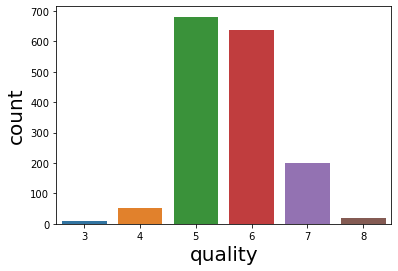

In [58]:
b = sns.countplot(x='quality', data=df)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

In [60]:
# The data is unbalanced so we should be using stratifiedkfold for this dataset

# StratifiedKFold

In [37]:
# Training data is in a csv file called train.csv
df = pd.read_csv("winequality-red.csv")

In [38]:
# we create a new column called kfold and fill it with -1
df["kfold"] = -1

In [39]:
# the next step is to randomize the rows of the data
df = df.sample(frac=1).reset_index(drop=True)

In [41]:
# fetch targets
y = df.quality.values

In [42]:
# initiate the kfold class from model_selection module
kf = model_selection.StratifiedKFold(n_splits=5)

In [43]:
# fill the new kfold column
for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
    df.loc[v_, 'kfold'] = f

In [44]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,9.2,0.41,0.50,2.5,0.055,12.0,25.0,0.99520,3.34,0.79,13.3,7,0
1,7.9,1.04,0.05,2.2,0.084,13.0,29.0,0.99590,3.22,0.55,9.9,6,0
2,6.0,0.50,0.00,1.4,0.057,15.0,26.0,0.99448,3.36,0.45,9.5,5,0
3,7.5,0.61,0.26,1.9,0.073,24.0,88.0,0.99612,3.30,0.53,9.8,5,0
4,8.3,0.42,0.38,2.5,0.094,24.0,60.0,0.99790,3.31,0.70,10.8,6,0


In [45]:
df.kfold.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [46]:
# save the new csv with kfold column
df.to_csv("winequality-red_train_StratifiedKFolds.csv", index=False)

# stratified k-fold for a regression problem

In [61]:
# stratified-kfold for regression
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import model_selection

In [63]:
def create_folds(data):
    # we create a new column called kfold and fill it with -1
    data["kfold"] = -1
    # the next step is to randomize the rows of the data
    data = data.sample(frac=1).reset_index(drop=True)
    # calculate the number of bins by Sturge's rule
    # I take the floor of the value, you can also
    # just round it
    num_bins = int(np.floor(1 + np.log2(len(data))))
    # bin targets
    data.loc[:, "bins"] = pd.cut(
    data["target"], bins=num_bins, labels=False
    )
    # initiate the kfold class from model_selection module
    kf = model_selection.StratifiedKFold(n_splits=5)
    # fill the new kfold column
    # note that, instead of targets, we use bins!
    for f, (t_, v_) in enumerate(kf.split(X=data, y=data.bins.values)):
        data.loc[v_, 'kfold'] = f
    # drop the bins column
    data = data.drop("bins", axis=1)
    # return dataframe with folds
    return data

In [66]:
if __name__ == "__main__":
    # we create a sample dataset with 15000 samples
    # and 100 features and 1 target
    X, y = datasets.make_regression(
    n_samples=15000, n_features=100, n_targets=1
    )
    # create a dataframe out of our numpy arrays
    df = pd.DataFrame(
    X,
    columns=[f"f_{i}" for i in range(X.shape[1])]
    )
    df.loc[:, "target"] = y
    # create folds
    df = create_folds(df)

d:\miniconda3\envs\aaamlp\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
